In [2]:
from fastai import *
from fastai.vision import *

In [8]:
folder = 'apple'
file = 'apples.txt'

In [11]:
folder = 'orange'
file = 'oranges.txt'

In [14]:
folder = 'banana'
file = 'bananas.txt'

In [15]:
path = Path('data/fruits')
dest = path / folder
dest.mkdir(parents=True, exist_ok=True)

In [3]:
!ls data/fruits

apple  apples.txt  banana  bananas.txt	orange	oranges.txt


In [4]:
classes = ['apple', 'orange', 'banana']

In [16]:
download_images(path/file, dest, max_pics=400)

Error https://www.joyusgarden.com/wp-content/uploads/2018/05/lead-photo-1.png HTTPSConnectionPool(host='www.joyusgarden.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/05/lead-photo-1.png (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://betterhealthreview.com/wp-content/uploads/2018/01/This-Is-Why-You-Should-Never-Eat-Bananas-First-Thing-In-The-Morning-COVER-source-Lifehack.jpg HTTPSConnectionPool(host='betterhealthreview.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/01/This-Is-Why-You-Should-Never-Eat-Bananas-First-Thing-In-The-Morning-COVER-source-Lifehack.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://www.joyusgarden.com/wp-content/uploads/2017/12/P1070244_new.jpg HTTPSConnectionPool(host='www.joyusgarden.com', port=443): M

In [17]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=4)

apple


cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/apple/00000004.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/apple/00000393.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/apple/00000110.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/apple/00000158.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/apple/00000225.jpg'
orange


cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000145.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000033.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000224.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000309.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000199.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000032.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000266.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000066.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000178.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/orange/00000091.jpg'
cannot identify imag

cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000251.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000101.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000341.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000185.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000276.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000080.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000217.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000092.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000263.jpg'
cannot identify image file '/home/nihargajre/fastai-v3-recreated/data/fruits/banana/00000392.jpg'
cannot identify imag

In [18]:
np.random.seed(42) # Make it reproducible

In [44]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

In [45]:
data.classes

['apple', 'banana', 'orange']

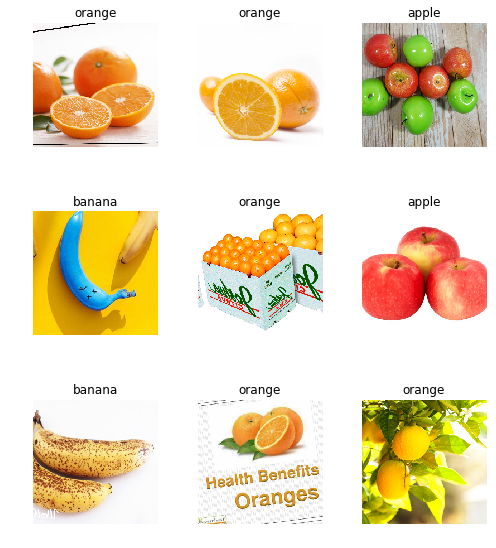

In [46]:
data.show_batch(rows=3, figsize=(7, 8))

In [47]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple', 'banana', 'orange'], 3, 885, 228)

## Train Model

In [48]:
learn = create_cnn(data, arch=models.resnet34, metrics=error_rate)

In [49]:
learn.fit_one_cycle(4)

Total time: 02:45
epoch  train_loss  valid_loss  error_rate
1      0.706877    0.158189    0.065789    (00:42)
2      0.394292    0.106128    0.035088    (00:43)
3      0.261133    0.112167    0.035088    (00:40)
4      0.191974    0.105158    0.035088    (00:39)



In [50]:
learn.save('stage-1')

In [51]:
learn.unfreeze()

In [52]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


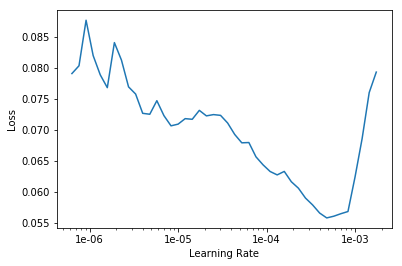

In [54]:
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 5e-4))

Total time: 01:22
epoch  train_loss  valid_loss  error_rate
1      0.074460    0.084642    0.026316    (00:40)
2      0.058789    0.083581    0.026316    (00:41)



In [57]:
learn.save('stage-2-better')

## Let's Interpret the Results

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

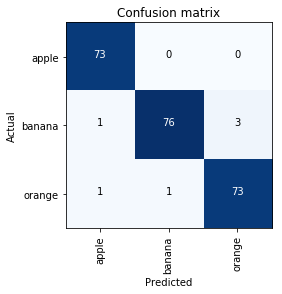

In [59]:
interp.plot_confusion_matrix()

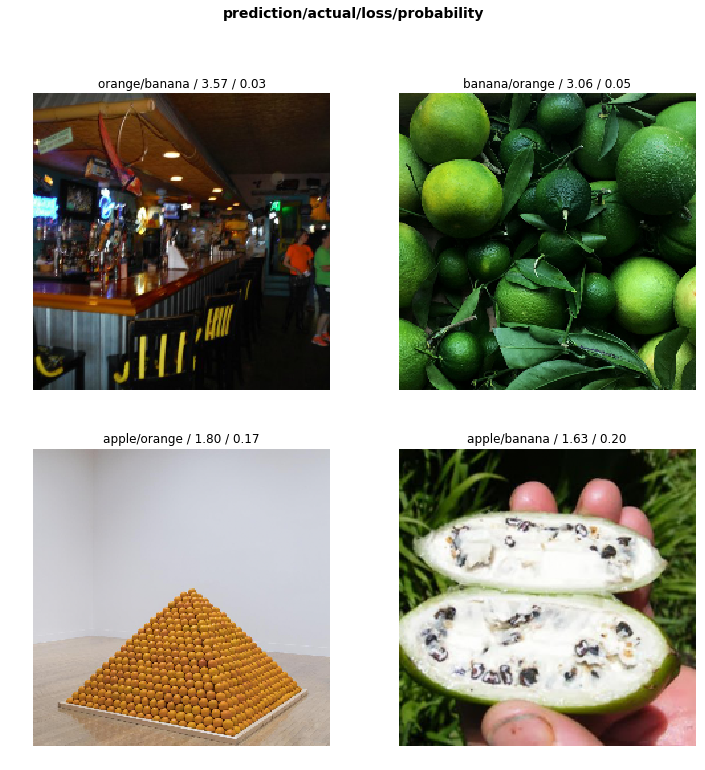

In [61]:
interp.plot_top_losses(4)

## Clean up data

In [62]:
from fastai.widgets import *

In [63]:
losses, idxs = interp.top_losses()

In [42]:
top_loss_paths = data.valid_ds.x[idxs]

In [66]:
fd = ImageDeleter(data, idxs)

Button(button_style='primary', description='Confirm', style=ButtonStyle())